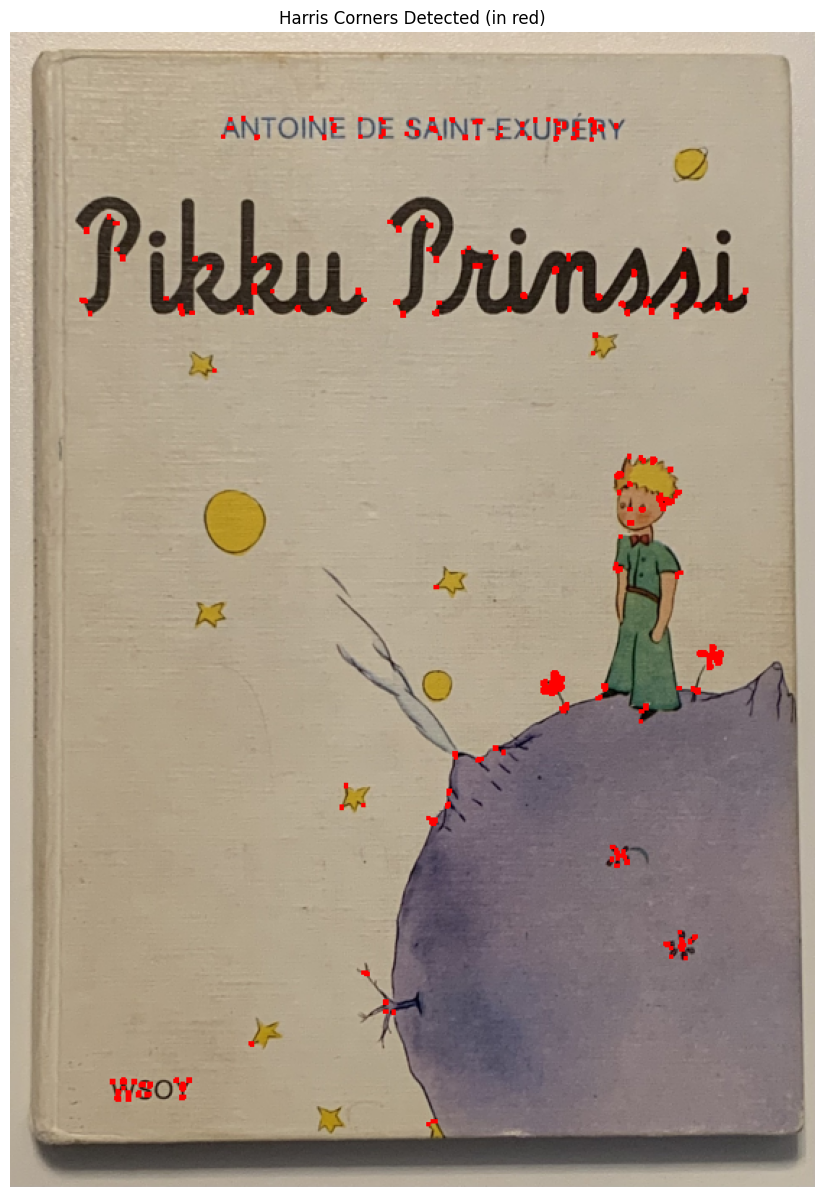

In [2]:
# Cell 1: Harris Corner Detection
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

# Load and preprocess image
img = cv.imread('resources/ref1.png')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
gray = np.float32(gray)

# Harris corner detection
# Adjust these parameters for better results:
# blockSize: neighborhood size (try 2, 3, 5)
# ksize: Sobel aperture (usually 3)
# k: Harris parameter (0.04 - 0.1 often works well)
corners = cv.cornerHarris(gray, blockSize=3, ksize=3, k=0.1)

# Dilate for marking the corners
vis_corners = cv.dilate(corners, None)

# Mark strong corners in red
threshold = 0.1 * vis_corners.max()
img[vis_corners > threshold] = [255, 0, 0]  # Red corners

# Display result
fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(img)
ax.set_title("Harris Corners Detected (in red)")
plt.axis('off')
plt.show()

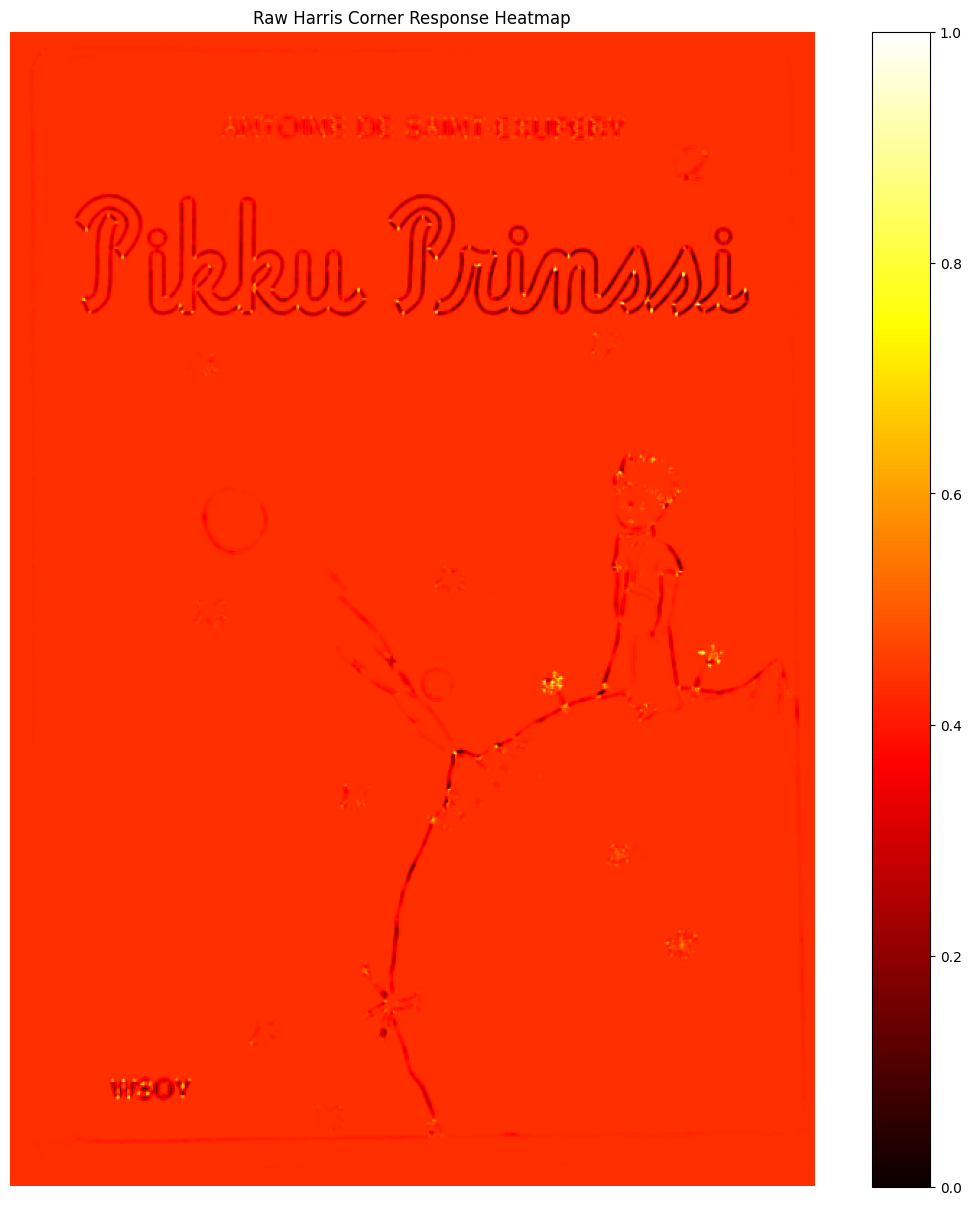

In [3]:
# Cell 2: Visualize the raw Harris response (optional)
# Replace img with corners to see the response heatmap
response_vis = corners.copy()
response_vis = (response_vis - response_vis.min()) / (response_vis.max() - response_vis.min())

plt.figure(figsize=(15, 15))
plt.imshow(response_vis, cmap='hot')
plt.title("Raw Harris Corner Response Heatmap")
plt.colorbar()
plt.axis('off')
plt.show()

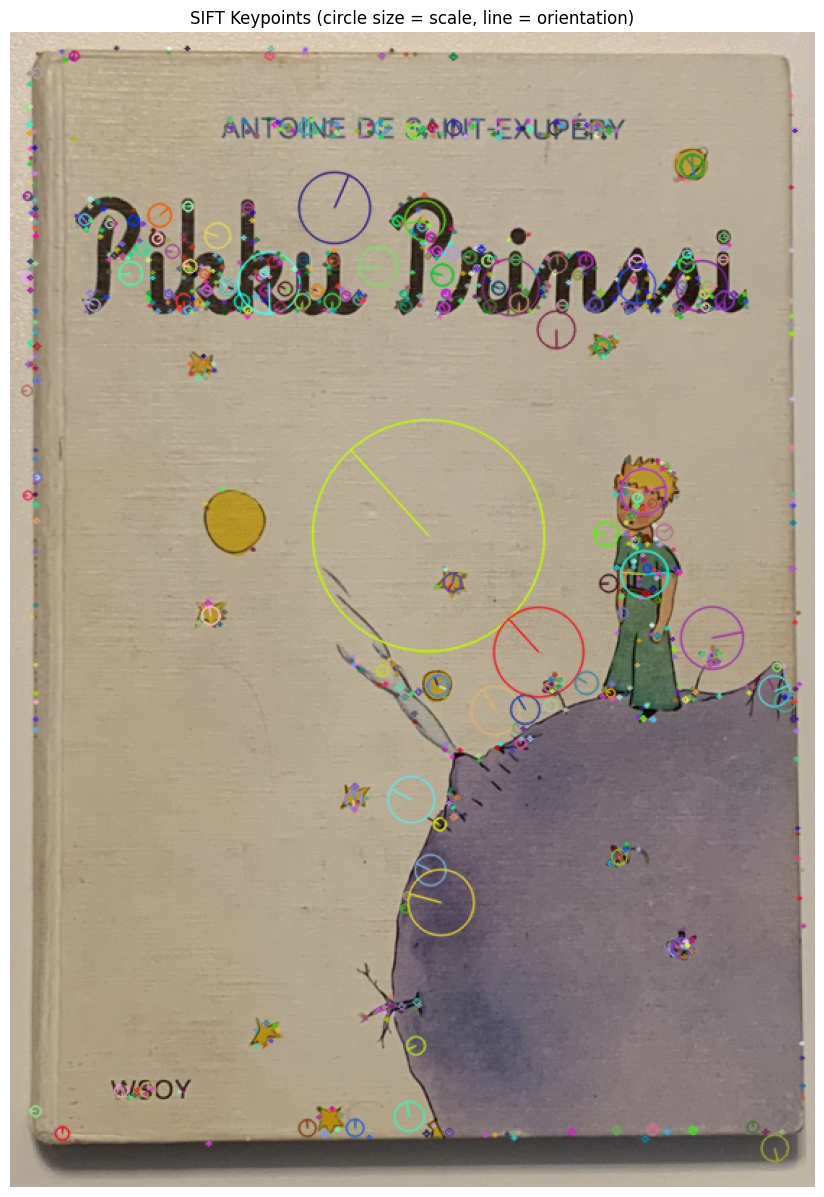

In [4]:
# Cell 3: SIFT Feature Detection on ref1.png
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

# Load image
img1 = cv.imread('resources/ref1.png')
img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)

# Create SIFT detector
sift = cv.SIFT_create()

# Detect keypoints (with rich visualization)
kp1 = sift.detect(img1, None)
kp1_img = cv.drawKeypoints(img1, kp1, None, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display
fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(kp1_img)
ax.set_title("SIFT Keypoints (circle size = scale, line = orientation)")
plt.axis('off')
plt.show()

Number of keypoints in ref1.png: 1074
Number of keypoints in rot1.png: 1252
Descriptor shape: (1074, 128) → 128-dimensional vector per keypoint


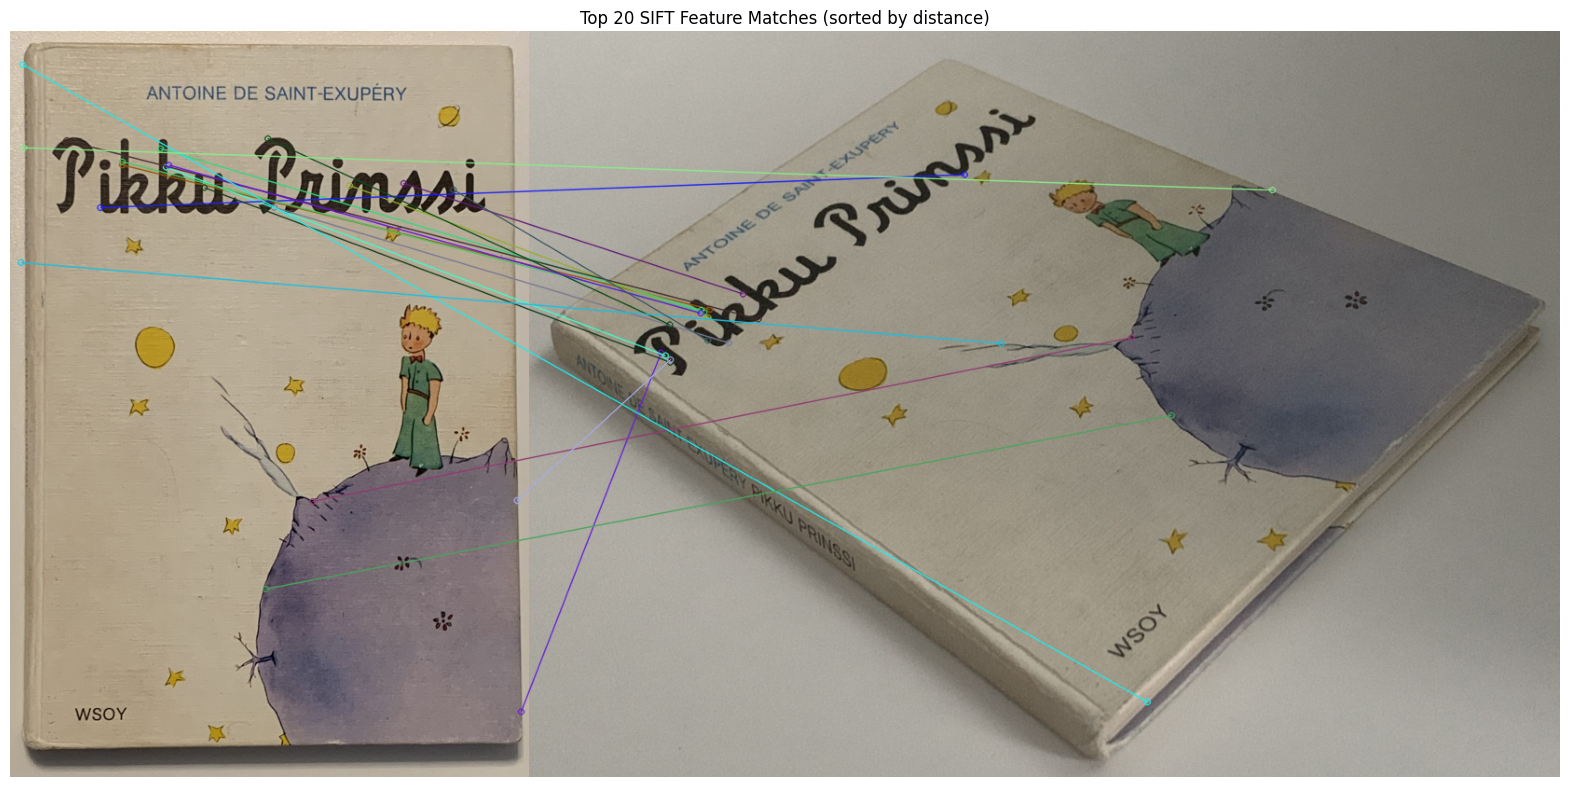

In [5]:
# Cell 4: SIFT Feature Matching between ref1.png and rot1.png
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

# Load both images
img1 = cv.imread('resources/ref1.png')
img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)

img2 = cv.imread('resources/rot1.png')
img2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)

# Initialize SIFT
sift = cv.SIFT_create()

# Detect keypoints and compute descriptors
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

print(f"Number of keypoints in ref1.png: {len(kp1)}")
print(f"Number of keypoints in rot1.png: {len(kp2)}")
print(f"Descriptor shape: {des1.shape} → 128-dimensional vector per keypoint")

# Brute Force Matcher with L2 norm
bf = cv.BFMatcher(cv.NORM_L2, crossCheck=True)
matches = bf.match(des1, des2)

# Sort matches by distance (lower = better)
matches = sorted(matches, key=lambda x: x.distance)

# Draw top 20 best matches
match_img = cv.drawMatches(img1, kp1, img2, kp2, matches[:20], None,
                           flags=cv.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)

# Display
fig, ax = plt.subplots(figsize=(20, 10))
ax.imshow(match_img)
ax.set_title("Top 20 SIFT Feature Matches (sorted by distance)")
plt.axis('off')
plt.show()

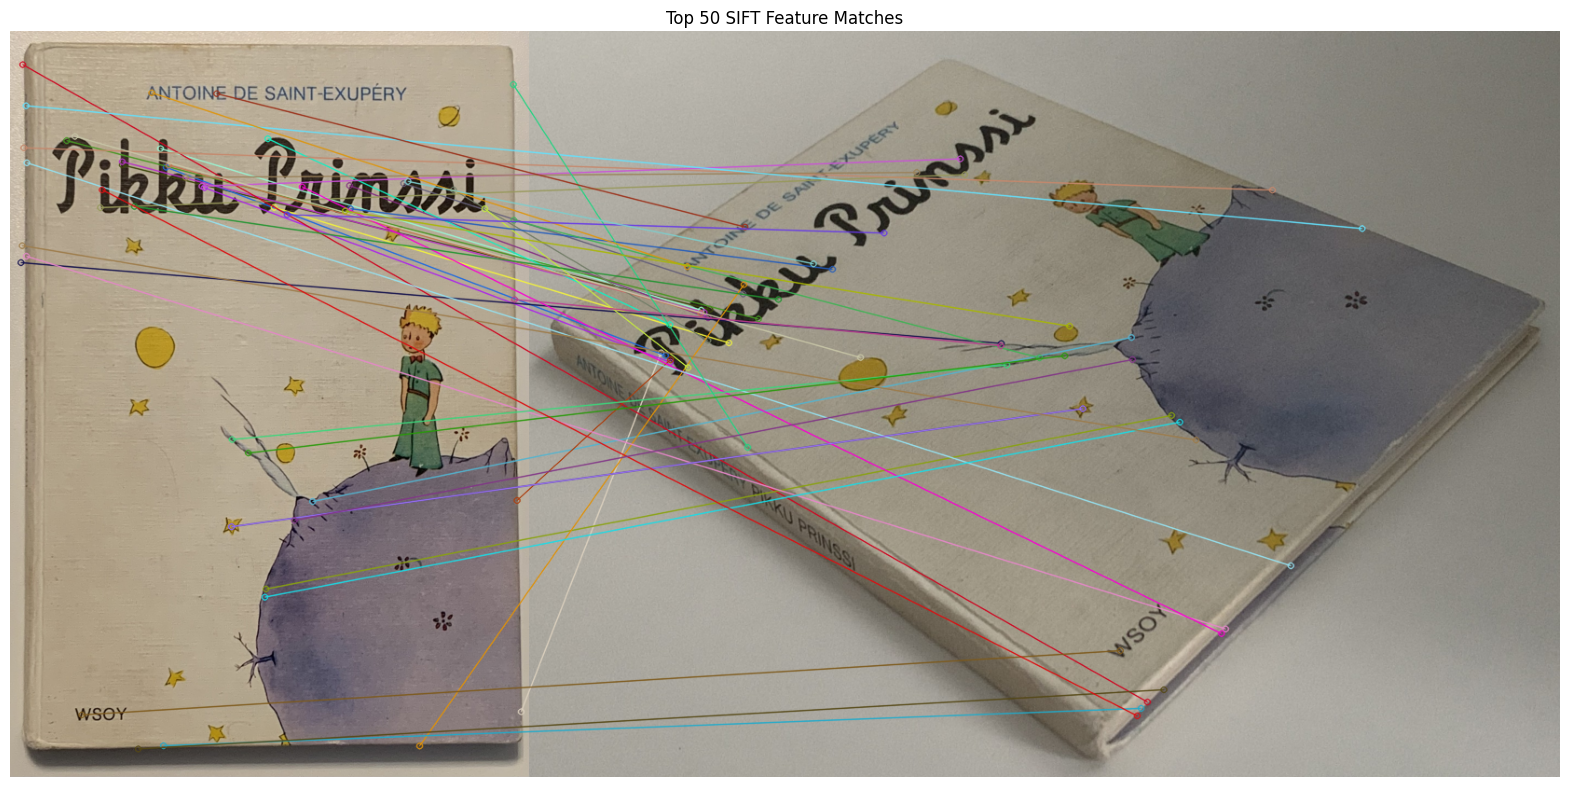

In [6]:
# Cell 5: Optional - Show more matches (e.g., top 50) or all
# Change [:20] to [:50] or remove slicing to see all matches
# Warning: too many matches may clutter the image

# Example: Show top 50
match_img_all = cv.drawMatches(img1, kp1, img2, kp2, matches[:50], None,
                               flags=cv.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)

fig, ax = plt.subplots(figsize=(20, 10))
ax.imshow(match_img_all)
ax.set_title("Top 50 SIFT Feature Matches")
plt.axis('off')
plt.show()

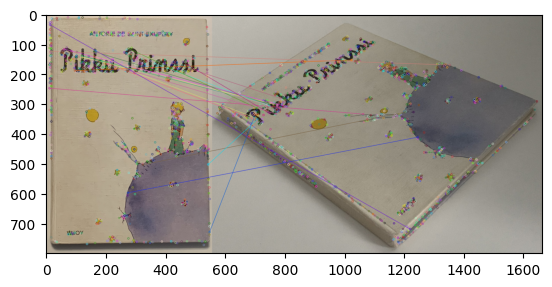

In [8]:
sift = cv.SIFT_create()
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)
bf = cv.BFMatcher(cv.NORM_L2, crossCheck=True)
matches = bf.match(des1, des2)
matches = sorted(matches, key=lambda x:x.distance)
res = cv.drawMatches(img1, kp1, img2, kp2, matches[:20], None)
plt.imshow(res)